In [543]:
import geopandas as gp
import pandas as pd

# Dataframe for shape/boundaries

In [544]:
gdf = gp.read_file("ph_cities_boundaries/ph_cities.shp")
gdf.head()

,NAME_1,NAME_2,ENGTYPE_2,geometry
0,Abra,Bangued,Municipality,"POLYGON ((120.61134 17.49558, 120.60941 17.496..."
1,Abra,Boliney,Municipality,"POLYGON ((120.81400 17.34210, 120.76862 17.340..."
2,Abra,Bucay,Municipality,"POLYGON ((120.67766 17.45736, 120.67324 17.469..."
3,Abra,Bucloc,Municipality,"POLYGON ((120.78922 17.44525, 120.80331 17.449..."
4,Abra,Daguioman,Municipality,"POLYGON ((120.90749 17.41933, 120.89281 17.446..."


<AxesSubplot: >

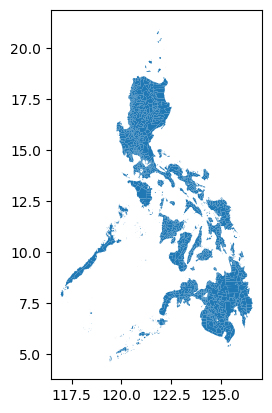

In [545]:
gdf.plot(legend=True)

# Dataframe for longitude/latitude

In [546]:
df = pd.read_csv("ph_cities_coordinates/cities_municipalities_with_coordinates.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,psgc,province,city_municipality,concat,corr_code,geog_level,old_names,city_cls,income_cls,urban_rural,2015_pop,2015_pop_tag,2020_pop,2020_pop_tag,status,search_term,longitude,latitude
0,102801000,Ilocos Norte,Adams,Ilocos Norte|Adams,12801000.0,Mun,NaN,NaN,5th,NaN,"1,792",NaN,"2,189",NaN,NaN,"Adams, Ilocos Norte",120.903571,18.461311
1,102802000,Ilocos Norte,Bacarra,Ilocos Norte|Bacarra,12802000.0,Mun,NaN,NaN,3rd,NaN,"32,215",NaN,"33,496",NaN,NaN,"Bacarra, Ilocos Norte",120.610659,18.251738
2,102803000,Ilocos Norte,Badoc,Ilocos Norte|Badoc,12803000.0,Mun,NaN,NaN,3rd,NaN,"31,616",NaN,"32,530",NaN,NaN,"Badoc, Ilocos Norte",120.474089,17.926701
3,102804000,Ilocos Norte,Bangui,Ilocos Norte|Bangui,12804000.0,Mun,NaN,NaN,4th,NaN,"14,672",NaN,"15,019",NaN,NaN,"Bangui, Ilocos Norte",120.765756,18.536739
4,102805000,Ilocos Norte,City of Batac,Ilocos Norte|City of Batac,12805000.0,City,NaN,CC,5th,NaN,"55,201",NaN,"55,484",NaN,NaN,"City of Batac, Ilocos Norte",120.581750,18.037300


In [547]:
# Check if all cities in df are in gdf

df_cities = list(df["city_municipality"])
gdf_cities = list(gdf["NAME_2"])

In [548]:
len(df_cities) == len(gdf_cities)

False

In [549]:
len(df_cities)

1634

In [550]:
len(gdf_cities)

1628

In [551]:
df_cities_cleaned = []

In [552]:
def clean_city_names(city):
    if "Gen." in city:
        return city.replace("Gen.","General").lower()
    elif "City of " in city:
        return city.replace("City of ", "").lower()
    elif " City" in city:
        return city.replace(" City", "").lower()
    else:
        return city.lower()

In [553]:
df["cleaned_names"] = df["city_municipality"].apply(clean_city_names)
gdf["cleaned_names"] = gdf["NAME_2"].apply(clean_city_names)

In [554]:
df = df.merge(gdf,
              how="left",
              on="cleaned_names")

In [555]:
df.loc[df["geometry"].isnull()]

,psgc,province,city_municipality,concat,corr_code,geog_level,old_names,city_cls,income_cls,urban_rural,...,2020_pop_tag,status,search_term,longitude,latitude,cleaned_names,NAME_1,NAME_2,ENGTYPE_2,geometry
187,105530000,Pangasinan,Pozorrubio,Pangasinan|Pozorrubio,15530000.0,Mun,NaN,NaN,1st,NaN,...,NaN,NaN,"Pozorrubio, Pangasinan",120.545229,16.110281,pozorrubio,NaN,NaN,NaN,None
469,304917000,Nueva Ecija,Science City of Muñoz,Nueva Ecija|Science City of Muñoz,34917000.0,City,NaN,CC,4th,NaN,...,NaN,NaN,"Science City of Muñoz, Nueva Ecija",120.903945,15.713541,science muñoz,NaN,NaN,NaN,None
551,305421000,Pampanga,Sto. Tomas,Pampanga|Sto. Tomas,35421000.0,Mun,NaN,NaN,4th,NaN,...,NaN,NaN,"Sto. Tomas, Pampanga",120.704339,14.996771,sto. tomas,NaN,NaN,NaN,None
649,401018000,Batangas,Mataasnakahoy,Batangas|Mataasnakahoy,41018000.0,Mun,NaN,NaN,4th,NaN,...,NaN,NaN,"Mataasnakahoy, Batangas",121.113787,13.962523,mataasnakahoy,NaN,NaN,NaN,None
685,401028000,Batangas,City of Sto. Tomas,Batangas|City of Sto. Tomas,41028000.0,City,NaN,CC,1st (as Mun),NaN,...,NaN,NaN,"City of Sto. Tomas, Batangas",121.143418,14.108965,sto. tomas,NaN,NaN,NaN,None
987,1705324000,Palawan,Sofronio Española,Palawan|Sofronio Española,175324000.0,Mun,NaN,NaN,2nd,NaN,...,NaN,NaN,"Sofronio Española, Palawan",117.994111,8.958755,sofronio española,NaN,NaN,NaN,None
1115,501731000,Camarines Sur,Sagñay,Camarines Sur|Sagñay,51731000.0,Mun,NaN,NaN,4th,NaN,...,NaN,NaN,"Sagñay, Camarines Sur",123.522708,13.603393,sagñay,NaN,NaN,NaN,None
1316,603017000,Iloilo,Dueñas,Iloilo|Dueñas,63017000.0,Mun,NaN,NaN,4th,NaN,...,NaN,NaN,"Dueñas, Iloilo",122.618373,11.066244,dueñas,NaN,NaN,NaN,None
1408,701201000,Bohol,Alburquerque,Bohol|Alburquerque,71201000.0,Mun,NaN,NaN,5th,NaN,...,NaN,NaN,"Alburquerque, Bohol",123.956884,9.610419,alburquerque,NaN,NaN,NaN,None
1449,701226000,Bohol,Getafe,Bohol|Getafe,71226000.0,Mun,NaN,NaN,3rd,NaN,...,NaN,NaN,"Getafe, Bohol",124.153514,10.149711,getafe,NaN,NaN,NaN,None


In [556]:
df_nulls = pd.read_csv("conflict_index.csv")
df_nulls

,df_index,name,gdf_index
0,187,Pozorrubio,1262.0
1,469,Science City of Muñoz,1130.0
2,551,Sto. Tomas (Pampanga),1230.0
3,649,Mataasnakahoy,167.0
4,685,City of Sto. Tomas,177.0
5,987,Sofronio Española,1208.0
6,1115,Sagñay,371.0
7,1316,Dueñas,654.0
8,1408,Alburquerque,206.0
9,1449,Getafe,232.0


In [557]:
gdf_cols = list(gdf.drop(columns=["cleaned_names"]).columns)
gdf_cols

['NAME_1', 'NAME_2', 'ENGTYPE_2', 'geometry']

In [558]:
non_nulls = df_nulls.loc[~df_nulls["gdf_index"].isnull()]
non_nulls

,df_index,name,gdf_index
0,187,Pozorrubio,1262.0
1,469,Science City of Muñoz,1130.0
2,551,Sto. Tomas (Pampanga),1230.0
3,649,Mataasnakahoy,167.0
4,685,City of Sto. Tomas,177.0
5,987,Sofronio Española,1208.0
6,1115,Sagñay,371.0
7,1316,Dueñas,654.0
8,1408,Alburquerque,206.0
9,1449,Getafe,232.0


In [559]:
non_nulls["df_index"]

0      187
1      469
2      551
3      649
4      685
5      987
6     1115
7     1316
8     1408
9     1449
10    1467
11    1524
12    1551
13    1868
14    1879
15    2042
17    2258
20    2550
21    2585
22    2590
24    2638
27    2644
28    2646
Name: df_index, dtype: int64

In [560]:
for df_index in non_nulls["df_index"]:
    gdf_index = int(non_nulls["gdf_index"].loc[non_nulls["df_index"]==df_index].values[0])
    
    for col in gdf_cols:
        df[col].iat[df_index] = gdf[col].iat[gdf_index]

In [562]:
df.loc[df["geometry"].isnull()]

,psgc,province,city_municipality,concat,corr_code,geog_level,old_names,city_cls,income_cls,urban_rural,...,2020_pop_tag,status,search_term,longitude,latitude,cleaned_names,NAME_1,NAME_2,ENGTYPE_2,geometry
2097,1102317000,Davao del Norte,Island Garden City of Samal,Davao del Norte|Island Garden City of Samal,112317000.0,City,NaN,CC,4th,NaN,...,NaN,NaN,"Island Garden City of Samal, Davao del Norte",125.712044,7.078026,island garden samal,NaN,NaN,NaN,None
2548,1900712000,Basilan,Hadji Muhtamad,Basilan|Hadji Muhtamad,150712000.0,Mun,NaN,NaN,-,NaN,...,NaN,NaN,"Hadji Muhtamad, Basilan",121.604520,6.659597,hadji muhtamad,NaN,NaN,NaN,None
2549,1900713000,Basilan,Tabuan-Lasa,Basilan|Tabuan-Lasa,150713000.0,Mun,NaN,NaN,-,NaN,...,NaN,NaN,"Tabuan-Lasa, Basilan",121.928637,6.316046,tabuan-lasa,NaN,NaN,NaN,None
2610,1906619000,Sulu,Omar,Sulu|Omar,156619000.0,Mun,NaN,NaN,-,NaN,...,NaN,NaN,"Omar, Sulu",121.384627,6.009757,omar,NaN,NaN,NaN,None
2640,1908805000,Maguindanao del Sur,Datu Hoffer Ampatuan,Maguindanao del Sur|Datu Hoffer Ampatuan,153835000.0,Mun,NaN,NaN,-,NaN,...,NaN,NaN,"Datu Hoffer Ampatuan, Maguindanao del Sur",124.424571,6.858064,datu hoffer ampatuan,NaN,NaN,NaN,None
2643,1908808000,Maguindanao del Sur,Datu Salibo,Maguindanao del Sur|Datu Salibo,153836000.0,Mun,NaN,NaN,-,NaN,...,NaN,NaN,"Datu Salibo, Maguindanao del Sur",124.482383,6.976731,datu salibo,NaN,NaN,NaN,None
2656,1908821000,Maguindanao del Sur,Shariff Saydona Mustapha,Maguindanao del Sur|Shariff Saydona Mustapha,153837000.0,Mun,NaN,NaN,-,NaN,...,NaN,NaN,"Shariff Saydona Mustapha, Maguindanao del Sur",124.484400,6.881631,shariff saydona mustapha,NaN,NaN,NaN,None


In [569]:
gdf_ = gp.GeoDataFrame(df)

In [572]:
gdf_.to_file("ph_cities.shp", index=False)

/var/folders/d8/ppdd00vj50s7x6lk402s3p9h0000gn/T/ipykernel_4237/1976791220.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_.to_file("ph_cities.shp", index=False)


In [574]:
he = gp.read_file("/Users/ian/Documents/MachineLearning/omdena/mapping-urban-vulnerability-areas/philippines-chapter-urban-vunerability/src/data/geolocation/ph_cities.shp")